In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from D_model import model_sensitivity_analysis, objective_function
from SALib.sample import saltelli
from SALib.analyze import sobol

In [5]:
mu_max = 0.25
X_max = 22
Yxs = 0.33
m_s = 0.018

perc = 0.3
lb_mu_max, ub_mu_max = mu_max - (mu_max*perc), mu_max + (mu_max*perc)
lb_X_max, ub_X_max = X_max - (X_max*perc), X_max + (X_max*perc)
lb_Yxs, ub_Yxs = Yxs - (Yxs*perc), Yxs + (Yxs*perc)
lb_m_s, ub_m_s = m_s - (m_s*perc), m_s + (m_s*perc)

# Define the number of parameters and the parameter ranges
problem = {'num_vars' : 3,
           'names' : ['mu_max', 'X_max', 'Yxs'],
           'bounds' : [[lb_mu_max, ub_mu_max], 
                       [lb_X_max, ub_X_max], 
                       [lb_Yxs, ub_Yxs]]
}
#param_ranges = np.array([[0,5]*num_params])

n_samples = 64
param_values = saltelli.sample(problem, n_samples, calc_second_order=False)
param_values.shape

C:\Users\dxp2904\AppData\Local\Temp\ipykernel_3368\2241146554.py:22: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, n_samples, calc_second_order=False)


(320, 3)

In [6]:
param_values[1]

array([ 0.30039063, 20.659375  ,  0.39342188])

In [7]:
'''means = np.mean(param_values, axis=0)
std_devs = np.std(param_values, axis=0)
normalized_parameters = (param_values - means) / std_devs
normalized_parameters.shape'''

'means = np.mean(param_values, axis=0)\nstd_devs = np.std(param_values, axis=0)\nnormalized_parameters = (param_values - means) / std_devs\nnormalized_parameters.shape'

In [8]:
'''mins = np.min(param_values, axis=0)
maxs = np.max(param_values, axis=0)
normalized_parameters = (param_values - mins) / (maxs - mins)
normalized_parameters.shape'''

'mins = np.min(param_values, axis=0)\nmaxs = np.max(param_values, axis=0)\nnormalized_parameters = (param_values - mins) / (maxs - mins)\nnormalized_parameters.shape'

In [9]:
# Evaluate the model for each set of parameter samples
model_outputs = np.zeros(param_values.shape[0])
for n in range(param_values.shape[0]):
    # Define your fermentation model function here
    rmse = objective_function(param_values[n])
    model_outputs[n] = rmse

# Perform Sobol' analysis
sobol_indices = sobol.analyze(problem, model_outputs, print_to_console=False)

# Get the first-order indices and parameter names
first_order_indices = sobol_indices['S1']
first_order_indices

array([-0.00934211,  0.04357693,  0.09426875])

In [10]:
sorted_indices = np.argsort(first_order_indices)[::-1]
sorted_indices

array([2, 1, 0], dtype=int64)

<BarContainer object of 3 artists>

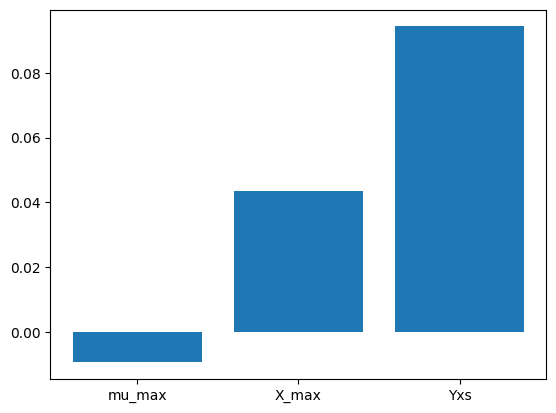

In [11]:
plt.bar(problem['names'], first_order_indices)

Overall, negative sensitivity indices in Sobol analysis indicate that the model output is primarily driven by parameter interactions rather than individual parameter effects. Understanding these interactions is crucial for accurately representing and predicting the system's behavior.